In [4]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.  Downloading librosa-0.10.2.post1-py3-none-any.whl (260 kB)



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\VIGNESH\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Users\VIGNESH\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'librosa'

In [5]:
example_file = "/content/pop.00094.wav"

In [6]:
# load audio file with Librosa
signal, sample_rate = librosa.load(example_file)
print(f'signal : {signal}')
print(f"sample_rate : {sample_rate}")

signal : [ 0.20877075  0.05661011  0.1496582  ... -0.15530396  0.04458618
  0.0536499 ]
sample_rate : 22050


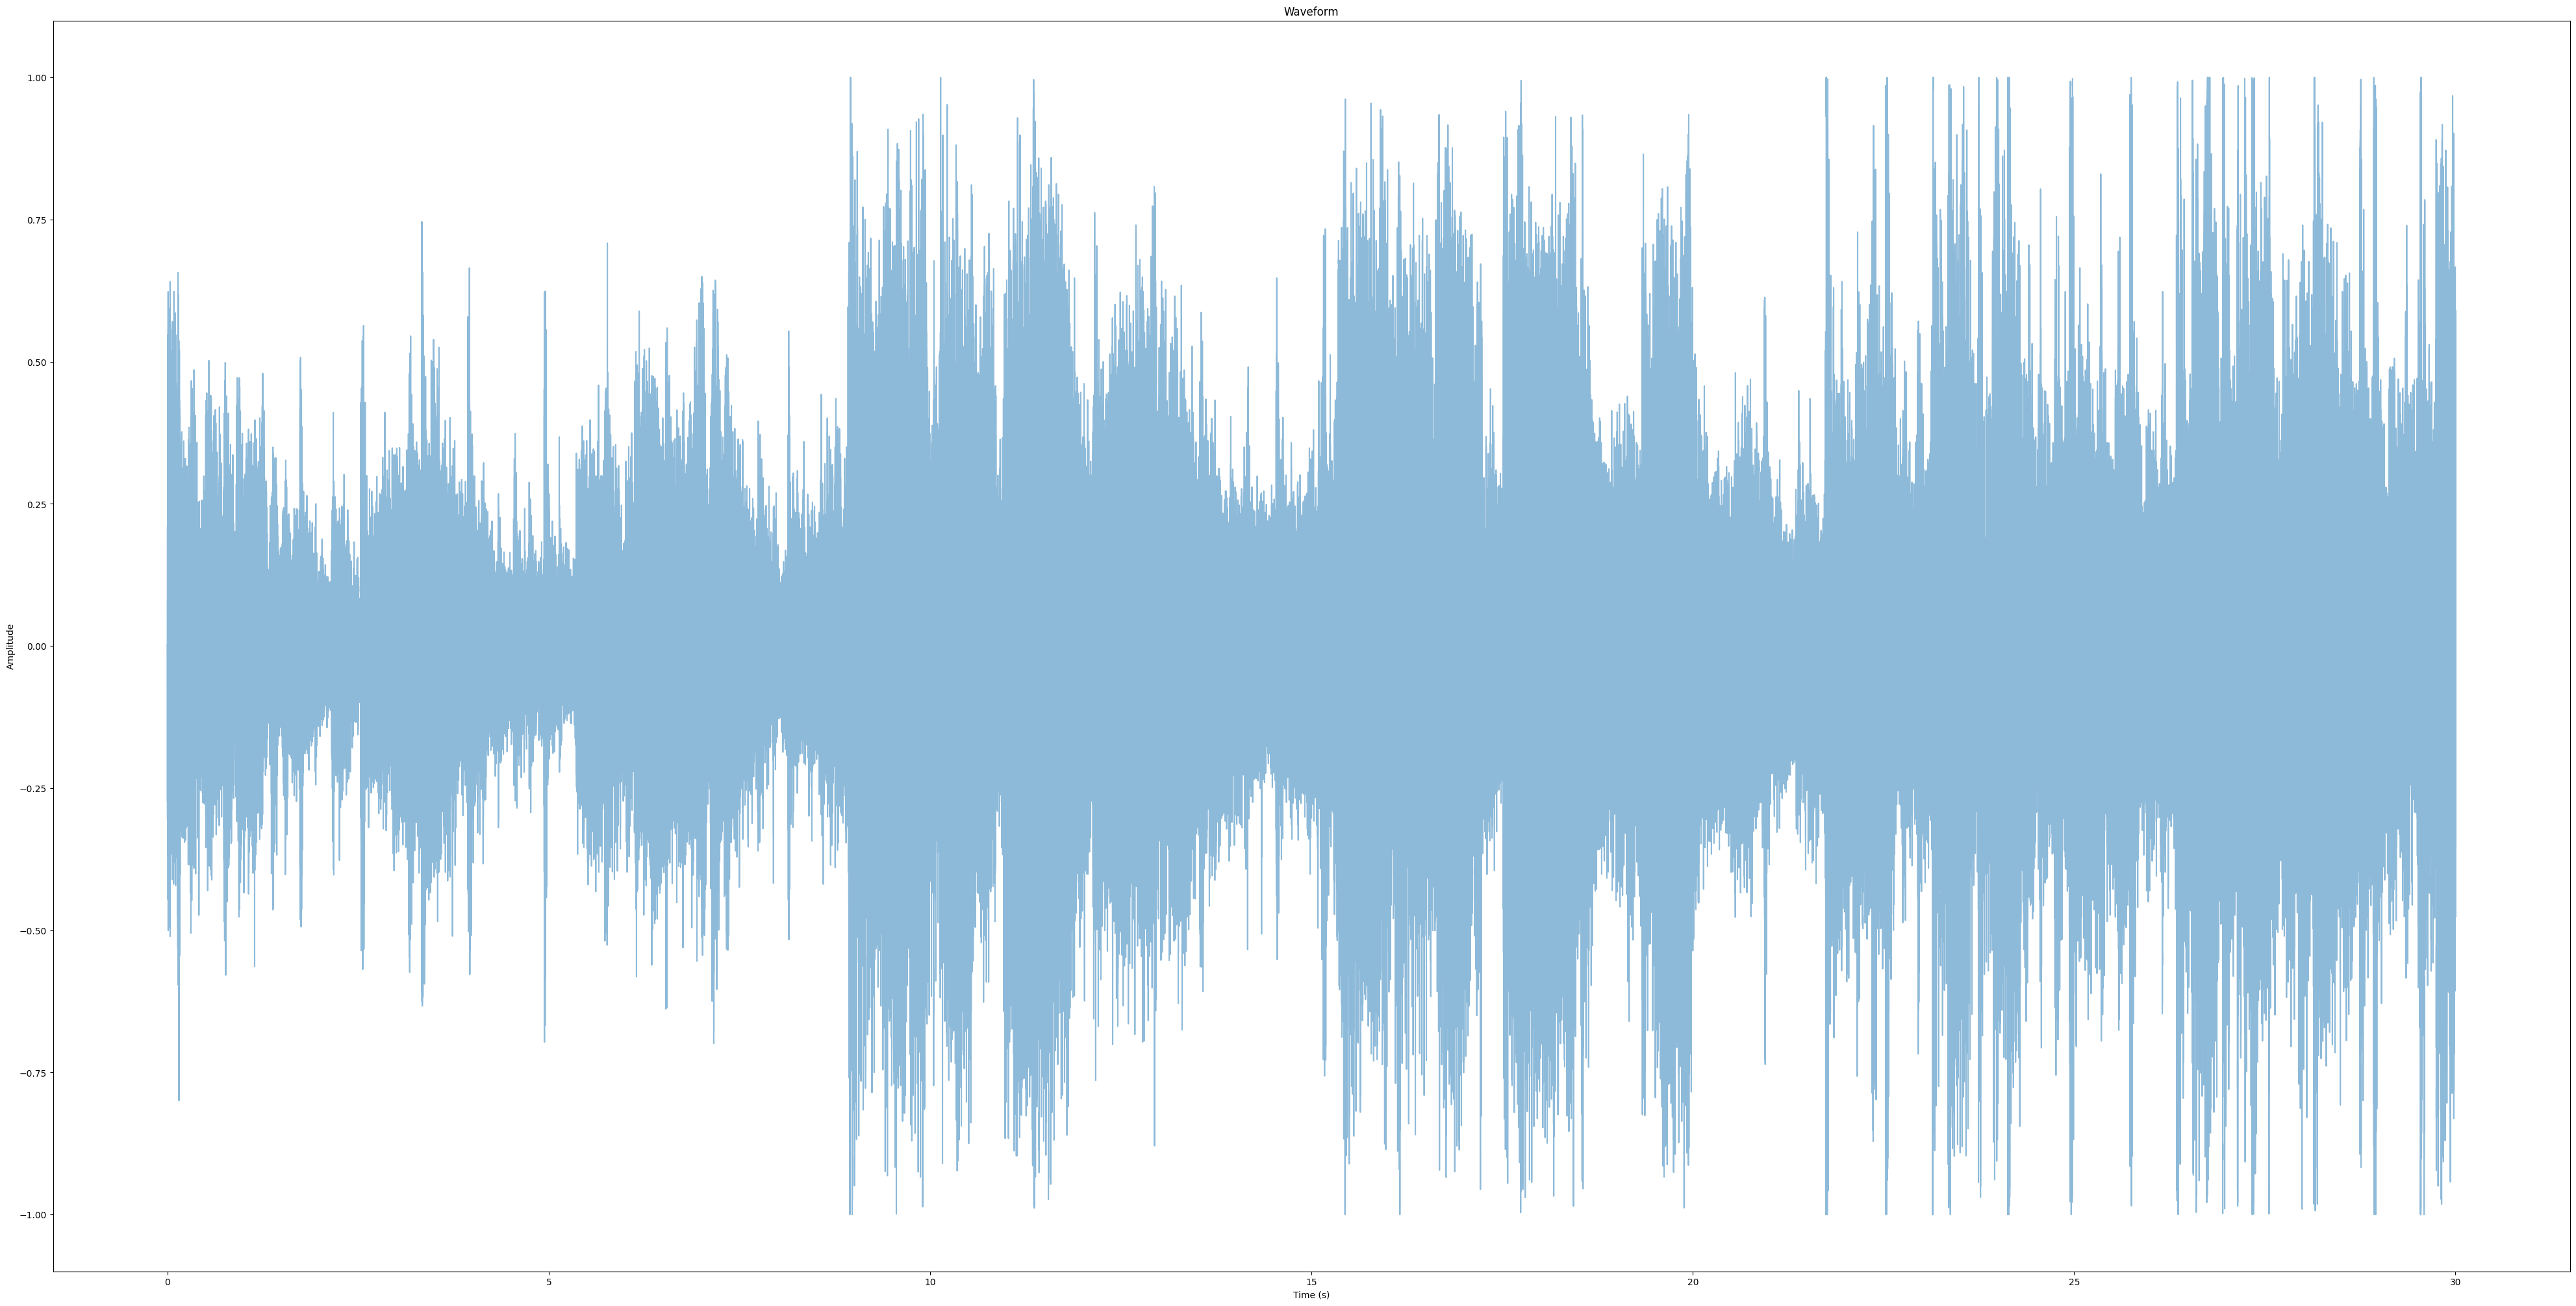

In [7]:
FIG_SIZE = (50,25)

# Create time axis
duration = len(signal) / sample_rate
time = np.linspace(0, duration, len(signal))

# Plot the waveform
plt.figure(figsize=FIG_SIZE)
plt.plot(time, signal, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()

In [8]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)
print(fft)

[-14.1340332  +0.j          -0.53263129-35.94446409j
  42.15592392 -6.15448286j ...  18.22993174-31.01765956j
  42.15592392 +6.15448286j  -0.53263129+35.94446409j]


In [9]:
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)
print(spectrum)

[14.1340332  35.94841019 42.60281189 ... 35.97812691 42.60281189
 35.94841019]


In [10]:
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))
print(f)

[0.00000000e+00 3.33331822e-02 6.66663643e-02 ... 2.20499333e+04
 2.20499667e+04 2.20500000e+04]


Text(0.5, 1.0, 'Power Spectrum')

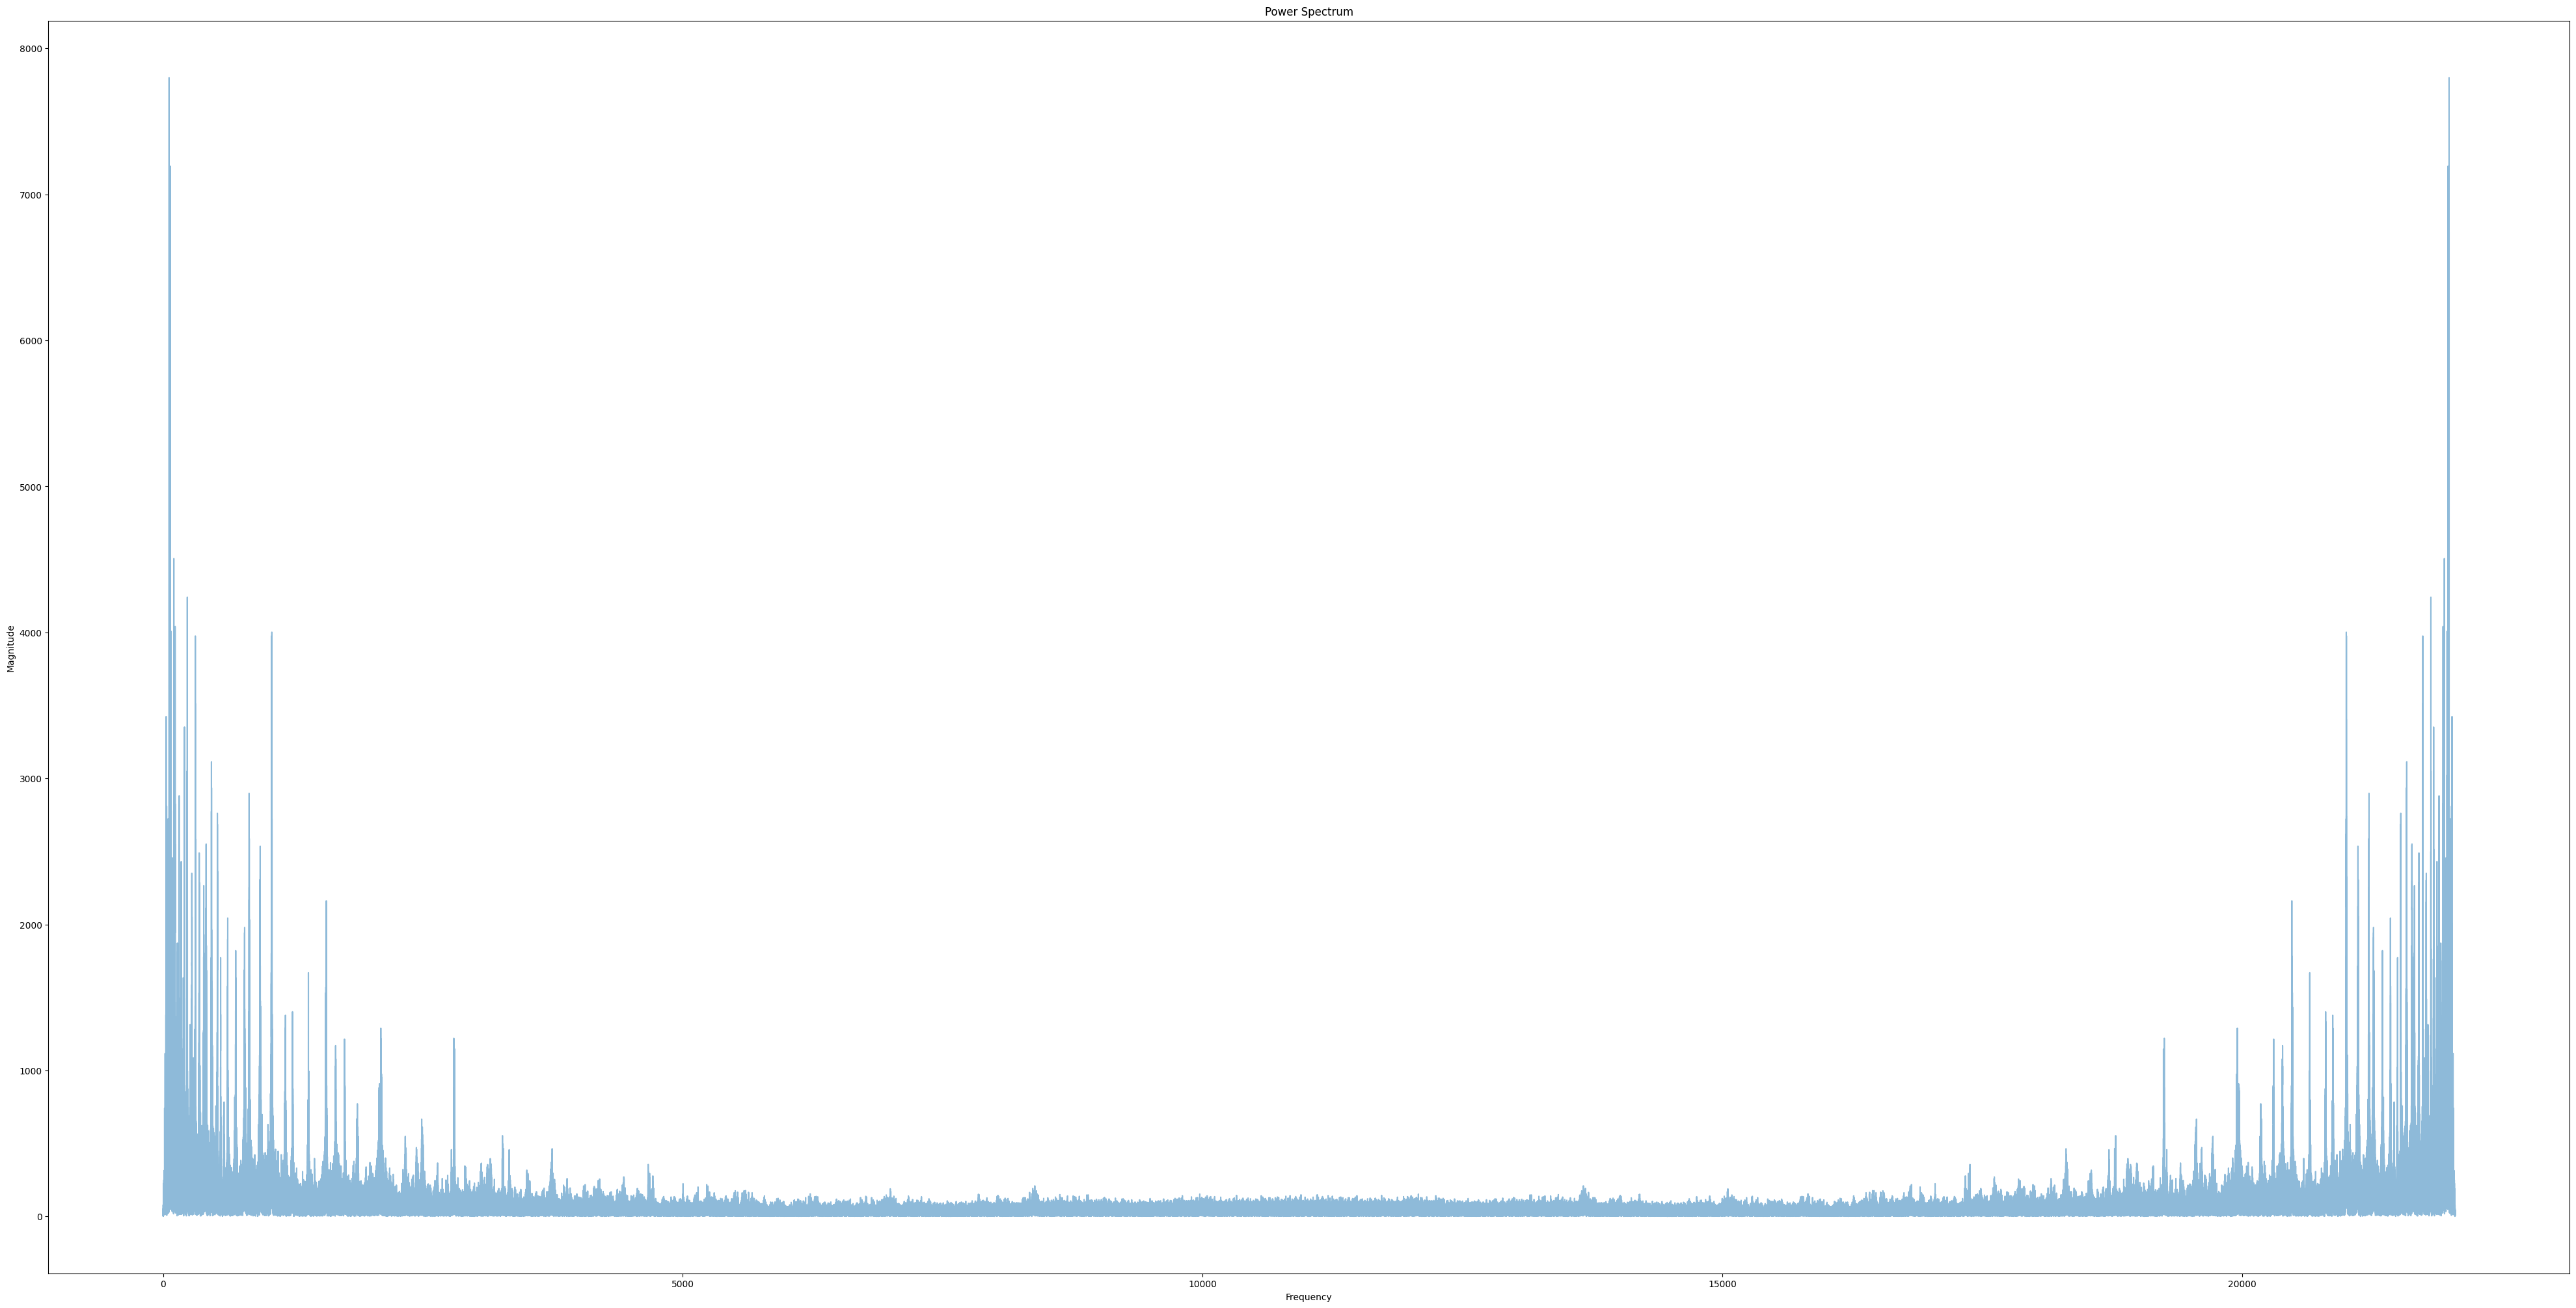

In [11]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [12]:
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
print(left_spectrum)
left_f = f[:int(len(spectrum)/2)]
print(left_f)

[14.1340332  35.94841019 42.60281189 ... 80.03379327 72.53696057
 16.34640413]
[0.00000000e+00 3.33331822e-02 6.66663643e-02 ... 1.10249167e+04
 1.10249500e+04 1.10249833e+04]


Text(0.5, 1.0, 'Power Spectrum')

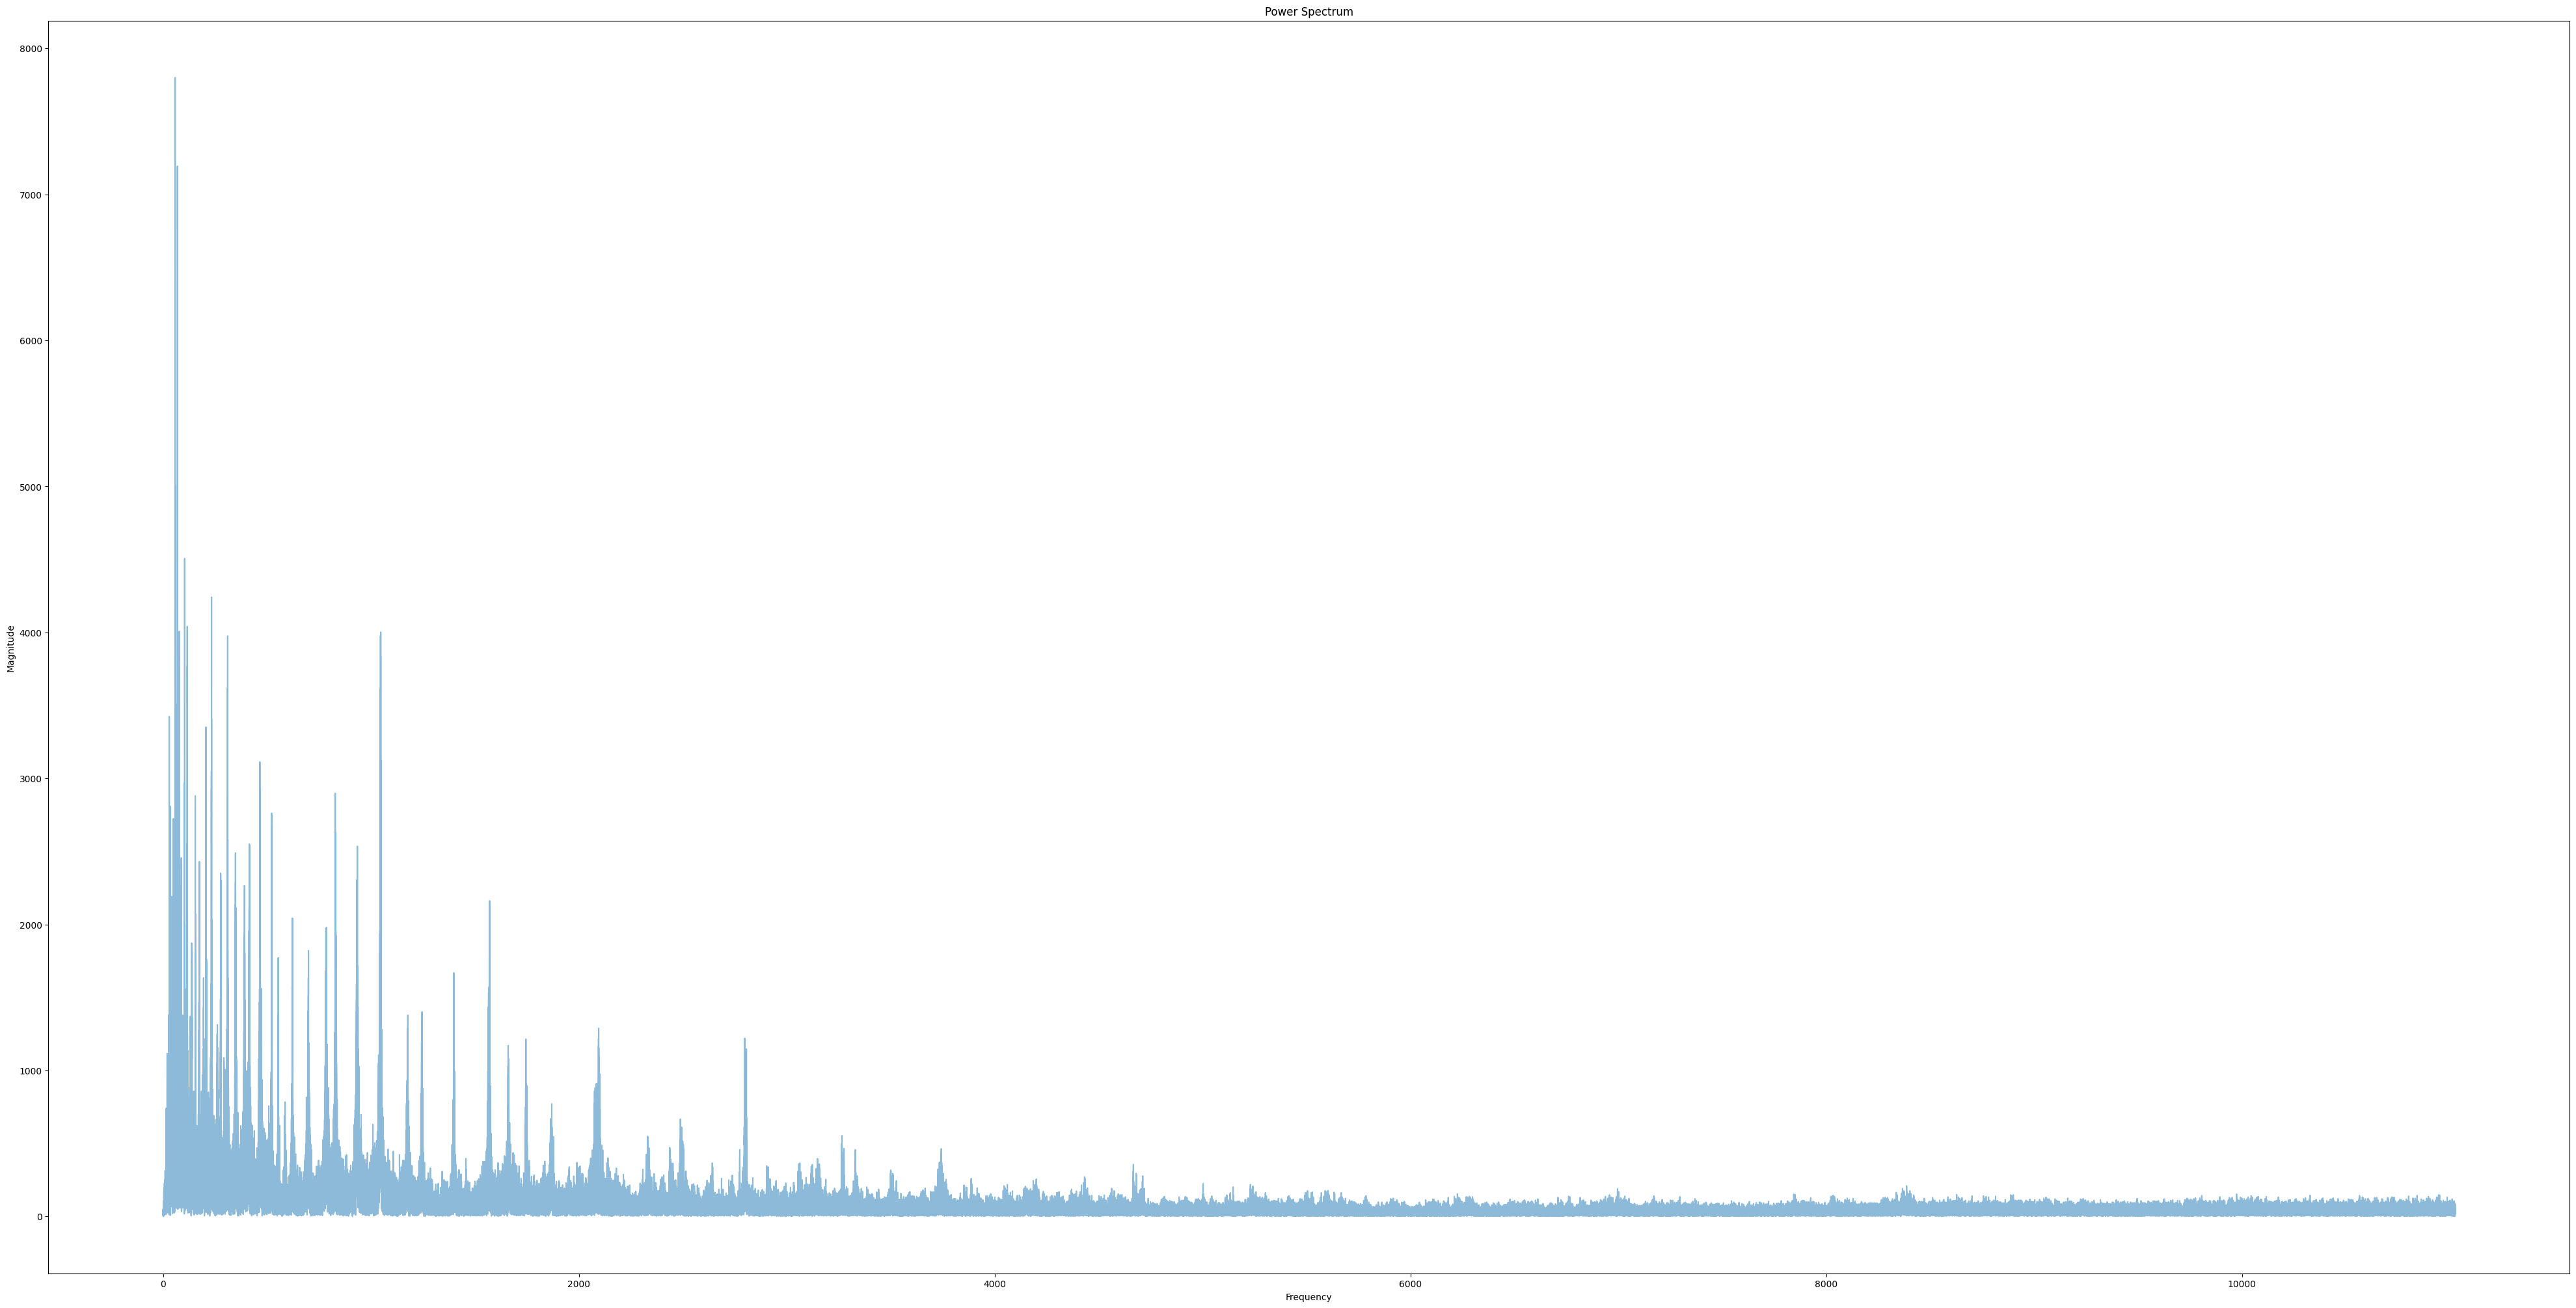

In [13]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [14]:
# Spectrogram Short-time Fourier transform (STFT).
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [15]:
# Perform Short-time Fourier transform (STFT).
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
print(stft)

[[ -1.798252  +0.j          -0.39980802+0.j
    0.42326108+0.j         ...   1.874552  +0.j
    7.7012267 +0.j          15.539551  +0.j        ]
 [  1.4321424 -0.0952318j    0.7318649 +1.5399965j
   -1.731317  -0.76844656j ...  -5.89499   +0.53504306j
    5.329565  +5.713981j   -19.31055   +2.4518344j ]
 [ -1.9155389 -0.57465285j  -1.2205582 +1.4893007j
    4.9876304 +0.37191463j ...   6.375137  -8.261838j
  -24.392084  +7.853928j    28.605947  +5.3131623j ]
 ...
 [  0.15330817-0.2125517j    1.0043787 +1.8163749j
   -1.2764875 -2.4258723j  ...   1.4686692 +5.637762j
   -2.6056247 -2.523363j     0.63016254-0.4065769j ]
 [ -0.20876636-0.62487733j  -2.011145  -0.42727512j
    0.29199684+1.8630288j  ...  -2.3624988 -0.8098218j
   -1.2882345 +2.5351489j    0.05048595+0.16342808j]
 [  1.0763127 +0.j           2.1017828 +0.j
    0.7410521 +0.j         ...   4.7193565 +0.j
    2.847928  +0.j           0.22267202+0.j        ]]


In [16]:
# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)
print(spectrogram)

[[ 1.798252    0.39980802  0.42326108 ...  1.874552    7.7012267
  15.539551  ]
 [ 1.4353052   1.705056    1.8941935  ...  5.919221    7.813696
  19.465582  ]
 [ 1.9998789   1.9255593   5.0014772  ... 10.435533   25.62534
  29.095186  ]
 ...
 [ 0.26207176  2.0755708   2.741218   ...  5.8259206   3.6272085
   0.74993974]
 [ 0.65882856  2.0560322   1.8857726  ...  2.497441    2.843682
   0.17104845]
 [ 1.0763127   2.1017828   0.7410521  ...  4.7193565   2.847928
   0.22267202]]


Text(0.5, 1.0, 'Spectrogram')

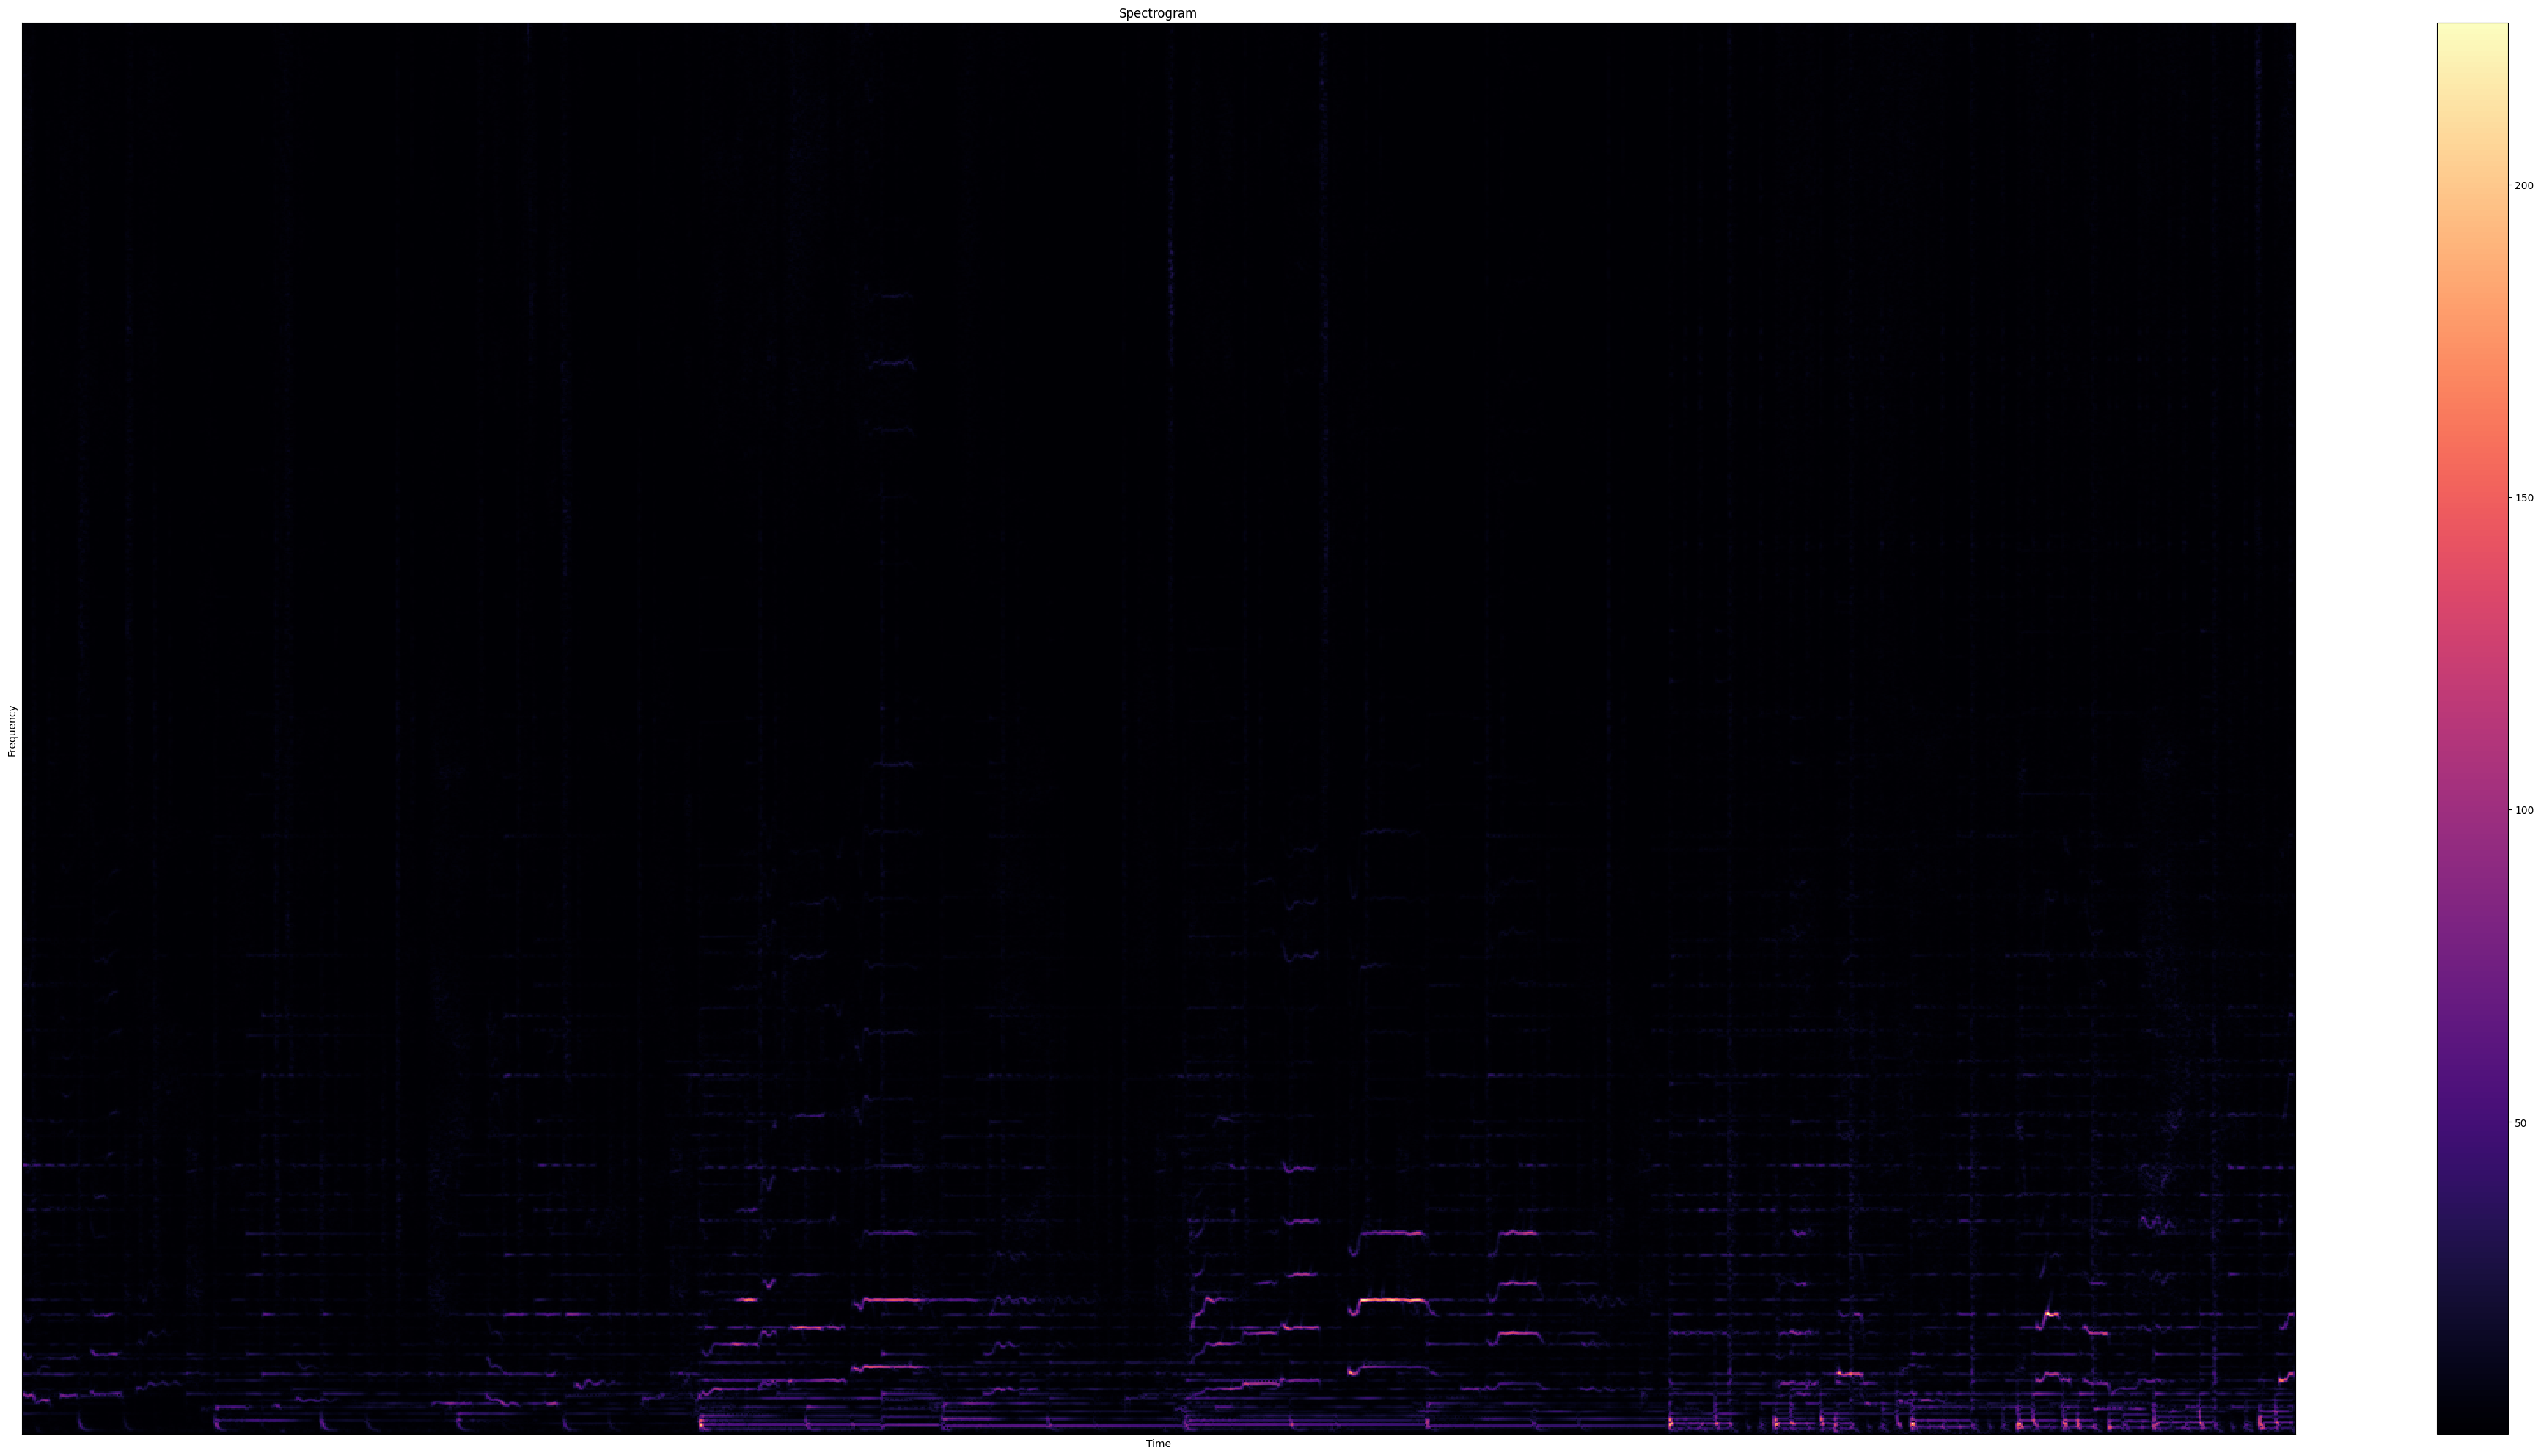

In [17]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [18]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

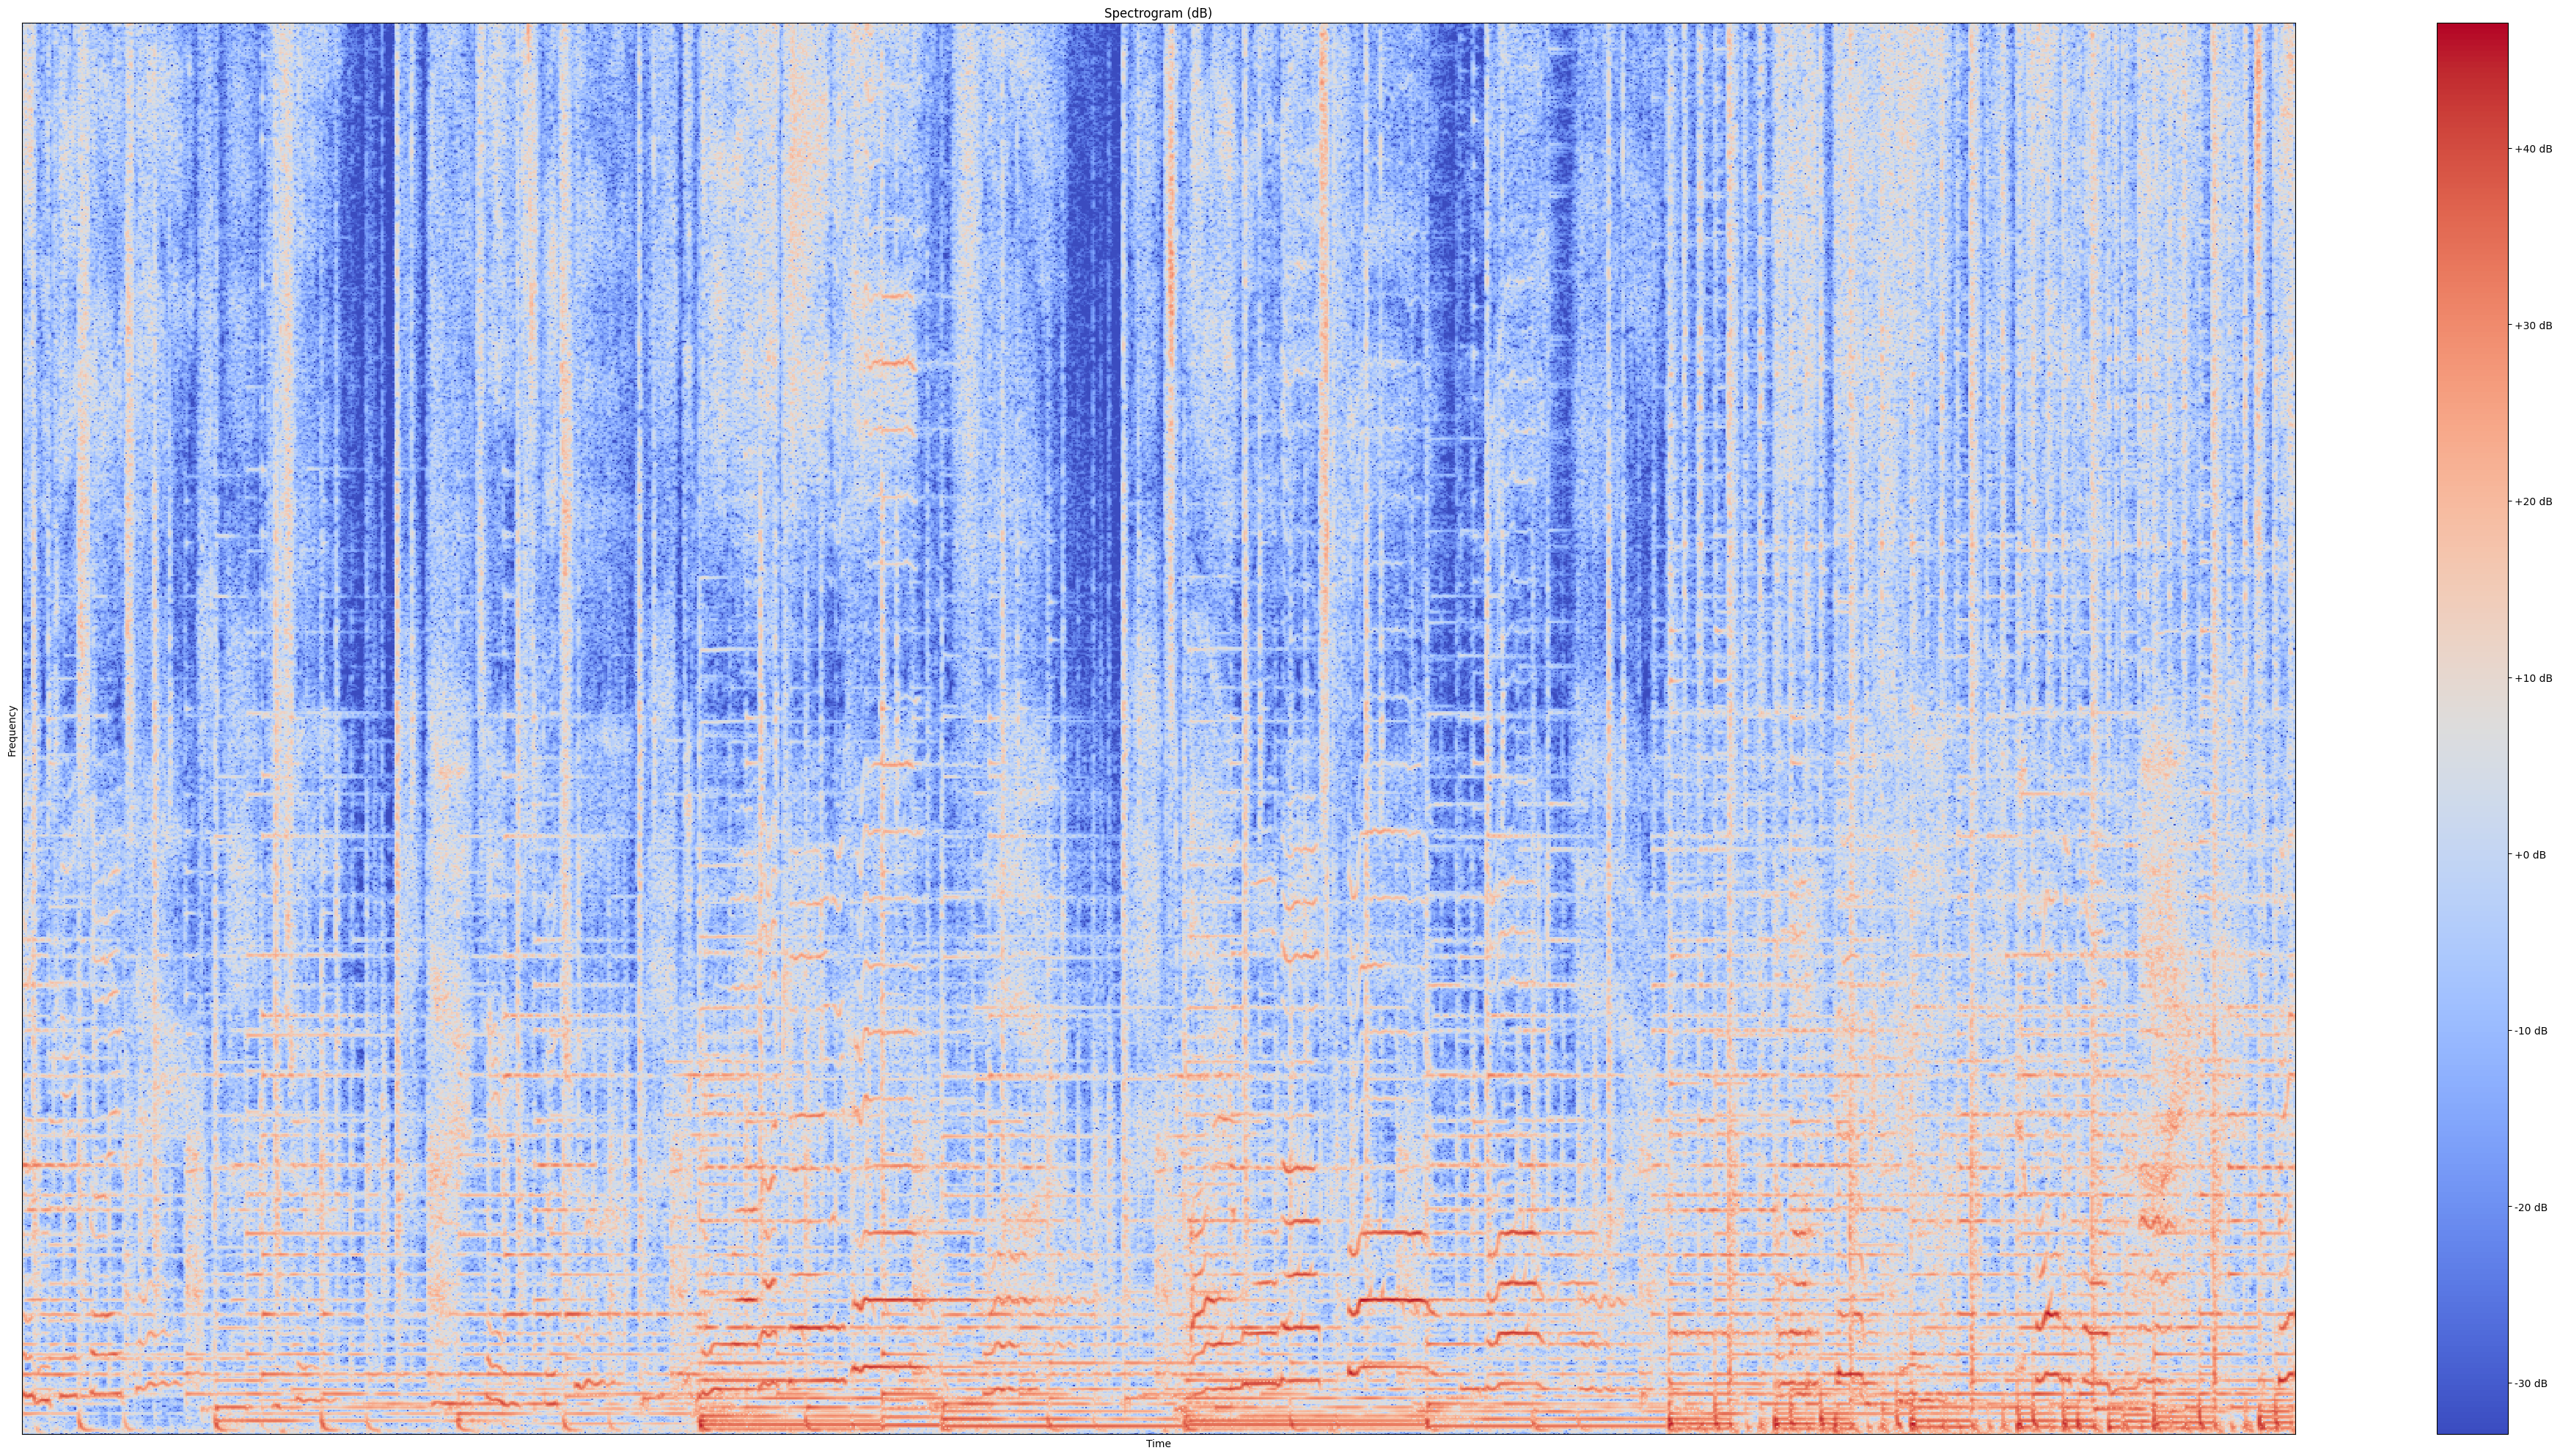

In [19]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [20]:
# Mel-frequency cepstral coefficients (MFCCs) (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
print(MFCCs)

[[-53.543716   -36.360336   -47.43735    ...  39.989586    27.479424
   -6.9113784 ]
 [ 77.3613      66.39235     57.846268   ...  54.19596     54.099632
   67.65075   ]
 [ -8.484988    -7.68616     -5.0248594  ...  18.511108    25.223408
   23.173628  ]
 ...
 [-11.92439    -15.244072   -17.665188   ...  -0.9772656   -6.4581175
   -6.7185884 ]
 [ -5.274066    -5.2878857   -4.4269476  ... -11.750805   -12.166963
  -10.628879  ]
 [  2.7898035    7.2996974    4.113161   ...  -0.21433687   1.9718946
    2.7071743 ]]


Text(0.5, 1.0, 'MFCCs')

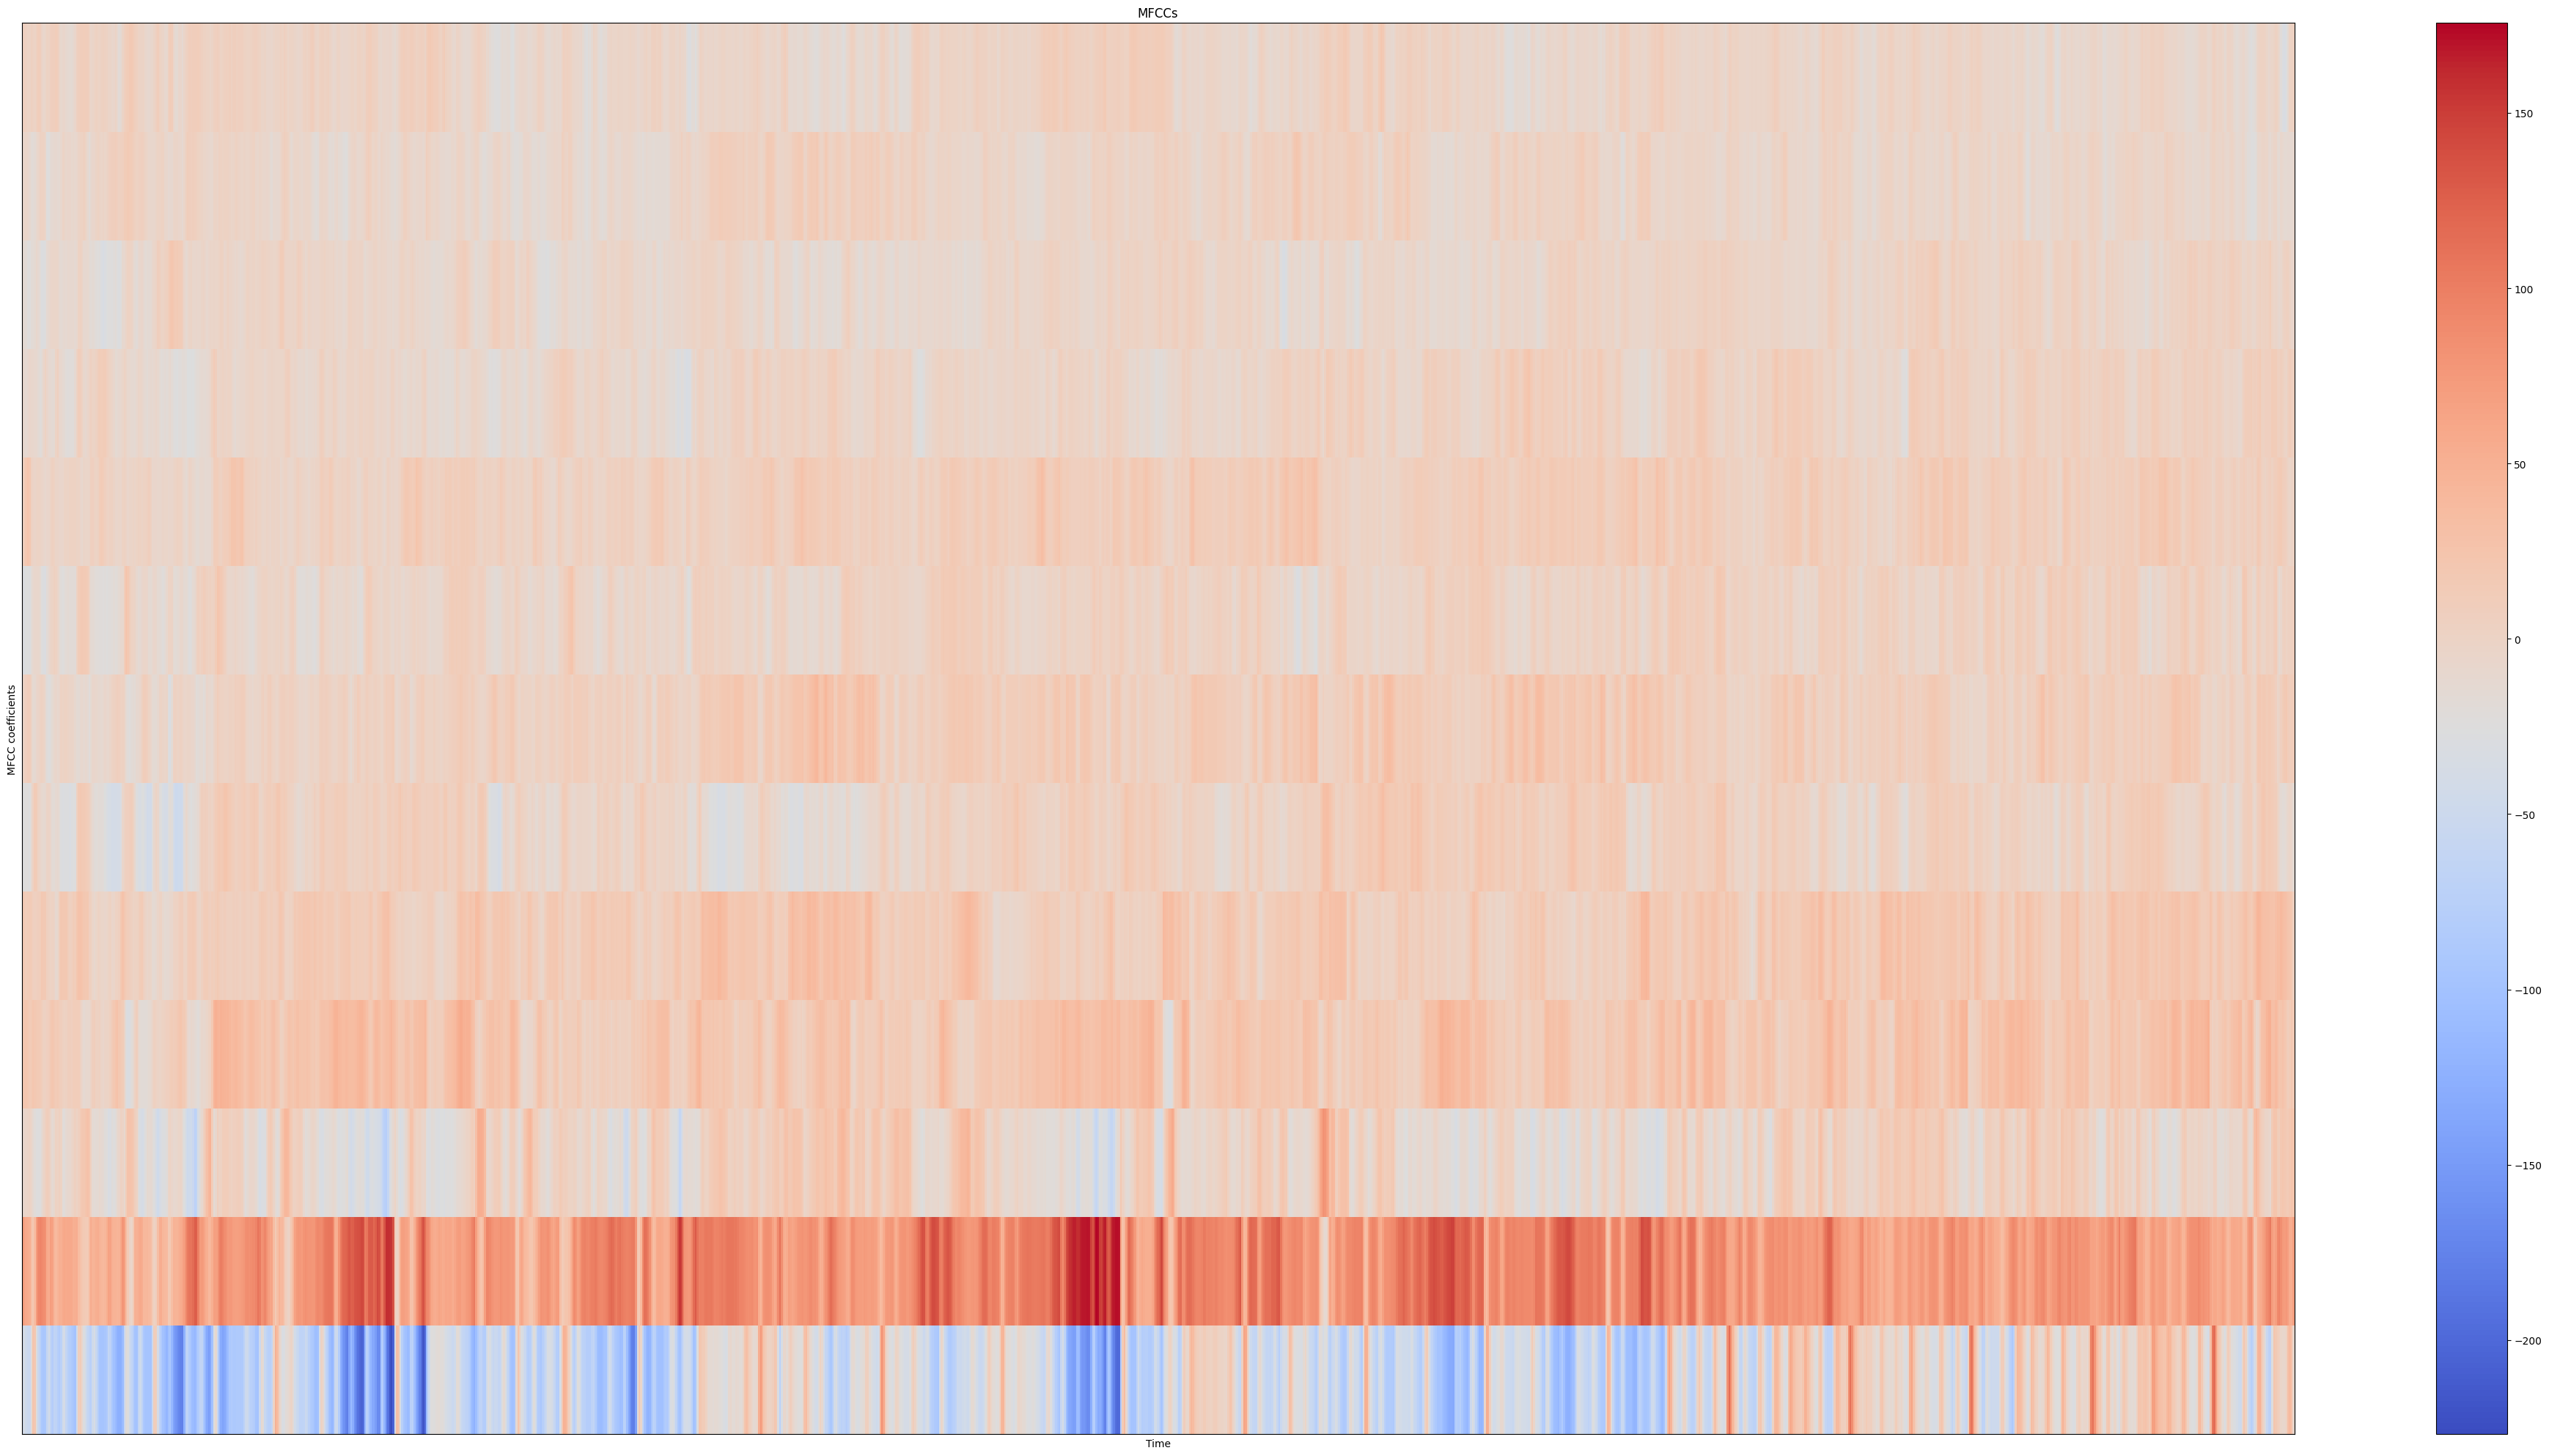

In [21]:
# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [22]:
import json
import os
import math

In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

100%|██████████| 1.21G/1.21G [00:17<00:00, 73.3MB/s]

Extracting files...


In [24]:
DATASET_PATH = f"/{path}/Data/genres_original"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [25]:
import json
import os
import math
import librosa
import audioread

# ...

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            for f in filenames:
                try:
                    file_path = os.path.join(dirpath, f)
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                    for d in range(num_segments):
                        start = samples_per_segment * d
                        finish = start + samples_per_segment

                        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T

                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(file_path, d+1))

                except (librosa.LibrosaError, audioread.NoBackendError, OSError) as e:
                    print("Error processing {}: {}".format(file_path, str(e)))

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [26]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Streaming output truncated to the last 5000 lines.
//root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/blues/blues.00031.wav, segment:9
//root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/blues/blues.00031.wav, segment:10
//root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/blues/blues.00083.wav, segment:1
//root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/blues/blues.00083.wav, segment:2
//root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/blues/blues.00083.wav, segment:3
//root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/blues/blues.00083.wav, segment:4
//root/.cache/kagglehub/

<ipython-input-25-11a83b333391>:28: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing //root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/jazz/jazz.00054.wav: 
//root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/jazz/jazz.00077.wav, segment:1
//root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/jazz/jazz.00077.wav, segment:2
//root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/jazz/jazz.00077.wav, segment:3
//root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/jazz/jazz.00077.wav, segment:4
//root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/jazz/jazz.00077.wav, segment:5
//root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classi

In [27]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [28]:
DATA_PATH = "/content/data_10.json"

In [29]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [30]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [31]:
X.shape

(9986, 130, 13)

In [32]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 1690)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         865,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.2348 - loss: 13.1815 - val_accuracy: 0.2069 - val_loss: 2.2561
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.2462 - loss: 2.1234 - val_accuracy: 0.2734 - val_loss: 2.1384
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2835 - loss: 2.0048 - val_accuracy: 0.2850 - val_loss: 2.0857
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.3505 - loss: 1.8604 - val_accuracy: 0.2961 - val_loss: 2.0530
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.3676 - loss: 1.7532 - val_accuracy: 0.3037 - val_loss: 2.0196
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.3745 - loss: 1.7227 - val_accuracy: 0.3204 - val_loss: 2.0279
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3898 - loss: 1.6788 - val_accuracy: 0.3348 - val_loss: 2.0821
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4181 - loss: 1.5887 - val_acc

In [37]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

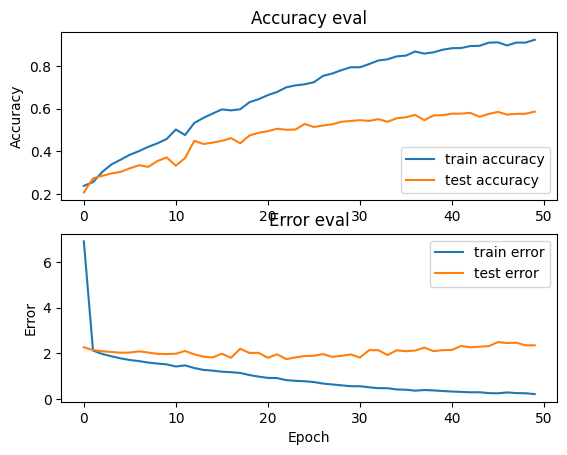

In [38]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [39]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [40]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.1433 - loss: 47.3542 - val_accuracy: 0.2146 - val_loss: 3.8093
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.1908 - loss: 8.2519 - val_accuracy: 0.2009 - val_loss: 3.3859
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.1639 - loss: 4.9993 - val_accuracy: 0.1612 - val_loss: 3.4329
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.1738 - loss: 4.1519 - val_accuracy: 0.1522 - val_loss: 3.4372
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.1701 - loss: 3.8358 - val_accuracy: 0.1445 - val_loss: 3.4419
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.1652 - loss: 3.6432 - val_accuracy: 0.1509 - val_loss: 3.4288
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.1924 - loss: 3.5650 - val_accuracy: 0.1679 - val_loss: 3.3998
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.2022 - loss: 3.4706 

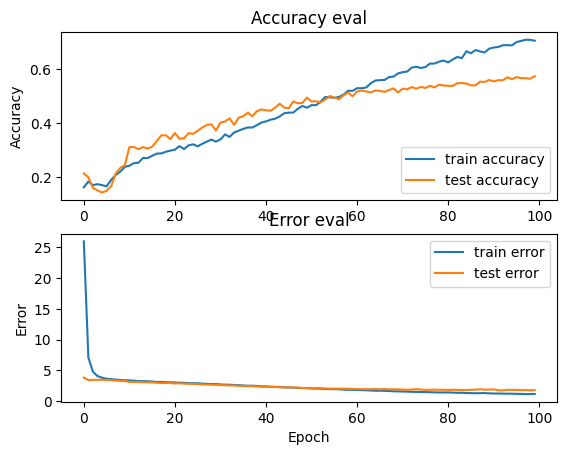

In [42]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [43]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [44]:
X_train.shape

(5991, 130, 13, 1)

In [45]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [46]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 11, 64)         │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 6, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 6, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 4, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 2, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 31, 2, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 1, 32)           │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 15, 1, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          30,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,866 (304.16 KB)

 Trainable params: 77,546 (302.91 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 31s 152ms/step - accuracy: 0.2077 - loss: 2.5459 - val_accuracy: 0.3865 - val_loss: 1.7325
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 134ms/step - accuracy: 0.3805 - loss: 1.7813 - val_accuracy: 0.4973 - val_loss: 1.4478
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 44s 149ms/step - accuracy: 0.4456 - loss: 1.5641 - val_accuracy: 0.5441 - val_loss: 1.3182
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 135ms/step - accuracy: 0.4793 - loss: 1.4430 - val_accuracy: 0.5607 - val_loss: 1.2377
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 44s 153ms/step - accuracy: 0.5208 - loss: 1.3409 - val_accuracy: 0.5794 - val_loss: 1.1894
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 135ms/step - accuracy: 0.5540 - loss: 1.2242 - val_accuracy: 0.6148 - val_loss: 1.1078
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 149ms/step - accuracy: 0.5787 - loss: 1.1886 - val_accuracy: 0.6422 - val_loss: 1.0540
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 136ms/step - accuracy: 0.6083 - loss: 1

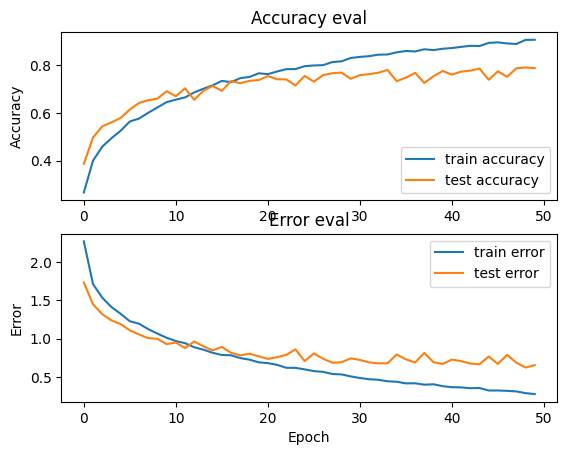

In [50]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [51]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 4s - 49ms/step - accuracy: 0.7733 - loss: 0.7017

Test accuracy: 0.7733280062675476


In [53]:
model_cnn.save("Music_Genrel_CNN_Model.h5")

In [54]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genrel_CNN_Model.h5")

In [55]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [56]:
X_to_predict.shape

(130, 13, 1)

In [57]:
print("Real Genre:", y_to_predict)

Real Genre: 2


In [58]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [59]:
X_to_predict.shape

(1, 130, 13, 1)

In [60]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


In [61]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 3


<ipython-input-61-e7146f1bf665>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Genre:", int(predicted_index))


In [62]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Genre: 5


<ipython-input-62-2fa16c5f3e4e>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Genre:", int(predicted_index))


In [63]:
len(X_test)

2497

In [64]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Genre: 6

Real Genre: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Genre: 8

Real Genre: 5


<ipython-input-64-b1c89bacb881>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Genre:", int(predicted_index))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Genre: 5

Real Genre: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Genre: 5

Real Genre: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Genre: 2

Real Genre: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Genre: 1

Real Genre: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Genre: 2

Real Genre: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Genre: 4

Real Genre: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Genre: 6

Real Genre: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Genre: 5


In [65]:
# Audio files pre-processing
def process_input(audio_file, track_duration):
    SAMPLE_RATE = 22050
    NUM_MFCC = 13
    N_FTT = 2048
    HOP_LENGTH = 512
    TRACK_DURATION = track_duration  # measured in seconds
    SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
    NUM_SEGMENTS = 10

    samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

    signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)

    mfcc_vectors = []  # List to store the MFCC vectors for each segment

    for d in range(NUM_SEGMENTS):
        # calculate start and finish sample for current segment
        start = samples_per_segment * d
        finish = start + samples_per_segment

        # extract mfcc
        mfcc = librosa.feature.mfcc(
            y=signal[start:finish],
            sr=sample_rate,
            n_mfcc=NUM_MFCC,
            n_fft=N_FTT,
            hop_length=HOP_LENGTH
        )
        mfcc = mfcc.T

        mfcc_vectors.append(mfcc)  # Append the extracted MFCC vectors to the list

    return mfcc_vectors

In [70]:
genre_dict = {
    0: "blues",
    1: "classical",
    2: "country",
    3: "disco",
    4: "hiphop",
    5: "jazz",
    6: "metal",
    7: "pop",
    8: "reggae",
    9: "rock"
}

def predict_genre(file_path):
    # Assuming there is a function called 'process_input' to process the audio file
    new_input_mfcc = process_input(file_path, 30)
    X_to_predict = np.array(new_input_mfcc)

    # Reshape X_to_predict to match the expected input shape of the model
    X_to_predict = X_to_predict.reshape(X_to_predict.shape[0], X_to_predict.shape[1], X_to_predict.shape[2], 1)

    prediction = reconstructed_model.predict(X_to_predict)

    # Get the most common predicted index
    predicted_index = np.argmax(np.bincount(prediction.argmax(axis=1)))
    predicted_genre = genre_dict[predicted_index]

    return predicted_genre

# Example usage
file_path = "/content/classical.00004.wav"
predicted_genre = predict_genre(file_path)
print("Predicted Genre:", predicted_genre)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Genre: disco
